In [1]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [2]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.

In [3]:
column_names = vehicles.columns.values
column_names[[68,70,71,72,73,74,76,79]]

array(['sCharger', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'startStop'], dtype=object)

Mixed data types sounds like it could be problematic so make a 
mental note of these column names. Remember, data cleaning 
and wrangling often consume 90 percent of project time.

In [4]:
len(vehicles)

41101

In [5]:
len(vehicles.columns)

83

In [6]:
print(vehicles.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
len(pd.unique(vehicles.year))

37

In [8]:
min(vehicles.year)

1984

In [9]:
max(vehicles["year"])

2020

In [10]:
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     27804
Premium Gasoline     11748
Diesel                1180
Electricity            203
Midgrade Gasoline      106
Natural Gas             60
Name: fuelType1, dtype: int64

In [11]:
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11047
Manual 5-spd                         8359
Automatic 3-spd                      3151
Automatic (S6)                       3097
Manual 6-spd                         2755
Automatic 5-spd                      2203
Automatic (S8)                       1650
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      821
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       242
Automatic (S4)                        233
Automatic (AV-S6)                     205
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       120
Automatic (AM-S6)                 

In [12]:
vehicles["trany2"] = vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)

A    28285
M    12805
Name: trany2, dtype: int64

In [13]:
grouped = vehicles.groupby("year")

In [14]:
averaged = grouped['comb08','highway08','city08'].agg([np.mean])

In [15]:
averaged.columns = ['comb08_mean','highway08_mean','city08_mean']
averaged['year'] = averaged.index

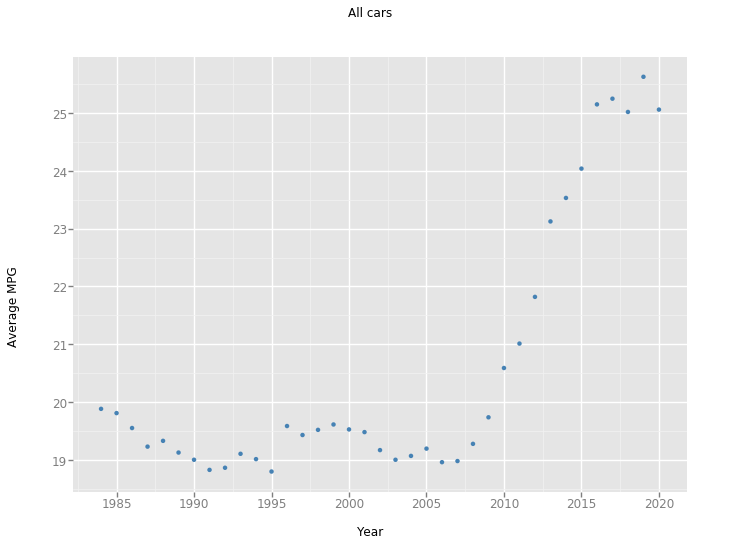

<ggplot: (143373629518)>

In [16]:
ggplot(averaged, aes('year', 'comb08_mean')) + geom_point(color='steelblue') + xlab("Year") + ylab("Average MPG") + ggtitle("All cars")

In [17]:
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline",  "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != "Hybrid"

In [18]:
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

37463

In [19]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.838219
2012  21.407328
2013  22.228877
2014  22.279835
2015  22.418539
2016  22.738764
2017  22.802867
2018  22.839861
2019  22.767587
2020  23.956250


In [20]:
pd.unique(vehicles_non_hybrid.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

In [21]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

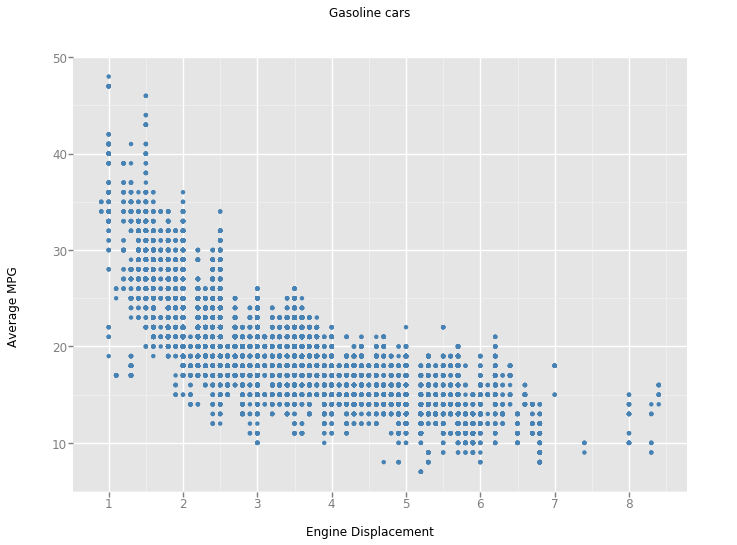

<ggplot: (-9223371893480943886)>

In [23]:
ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) + geom_point(color='steelblue') + xlab("Engine Displacement") + ylab("Average MPG") + ggtitle("Gasoline cars")

In [24]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ','comb08'].agg([np.mean])

In [25]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year,id_vars='year')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


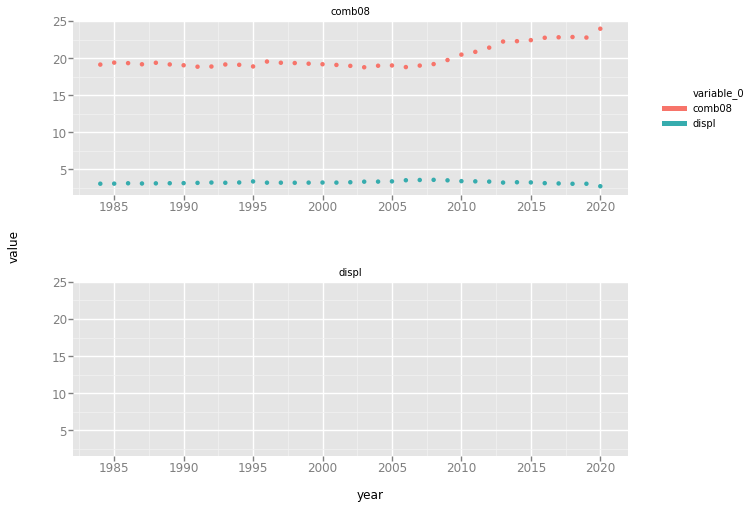

<ggplot: (-9223371893479780008)>

In [26]:
p = ggplot(aes(x='year', y='value', color = 'variable_0'),data=melted_avg_grouped_by_year)
p + geom_point() + facet_wrap("variable_0")

In [27]:
for (name, group) in grouped_by_year:
    print (name)
    print (group)

1984
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
18217  15.695714         0.0        0.0        0.0      18      0.0        0   
18218  14.982273         0.0        0.0        0.0      20      0.0        0   
18219  21.974000         0.0        0.0        0.0      13      0.0        0   
18220  21.974000         0.0        0.0        0.0      13      0.0        0   
18221  19.388824         0.0        0.0        0.0      15      0.0        0   
18222  18.311667         0.0        0.0        0.0      16      0.0        0   
18223  18.311667         0.0        0.0        0.0      16      0.0        0   
18224  16.480500         0.0        0.0        0.0      18      0.0        0   
18225  14.330870         0.0        0.0        0.0      21      0.0        0   
18227  13.733750         0.0        0.0        0.0      21      0.0        0   
18228  13.733750         0.0        0.0        0.0      21      0.0        0   
18229   8.039268         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
20739  36.623333         0.0        0.0        0.0       8      0.0        0   
20740  36.623333         0.0        0.0        0.0       8      0.0        0   
20741  36.623333         0.0        0.0        0.0       8      0.0        0   
20743  18.311667         0.0        0.0        0.0      15      0.0        0   
20744  18.311667         0.0        0.0        0.0      15      0.0        0   
20745  16.480500         0.0        0.0        0.0      18      0.0        0   
20746  15.695714         0.0        0.0        0.0      18      0.0        0   
20747  14.982273         0.0        0.0        0.0      20      0.0        0   
20748  16.480500         0.0        0.0        0.0      18      0.0        0   
20749  16.480500         0.0        0.0        0.0      19      0.0        0   
20750  15.695714         0.0        0.0        0.0      18      0.0        0   
20751  19.388824         0.0        0.0 

1993
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.695714         0.0        0.0        0.0      18      0.0        0   
12     13.733750         0.0        0.0        0.0      21      0.0        0   
13     15.695714         0.0        0.0        0.0      18      0.0        0   
15     14.330870         0.0        0.0        0.0      20      0.0        0   
16     16.480500         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
4427   18.311667         0.0        0.0        0.0      16      0.0        0   
4428   18.311667         0.0        0.0        0.0      16      0.0        0   
4429   21.974000         0.0        0.0        0.0      13      0.0        0   
4430   21.974000         0.0        0.0        0.0      12      0.0        0   
4431   21.974000         0.0        0.0        0.0      13      0.0        0   
4432   21.974000         0.0        0.0        0.0      12      0.0        0   
4434   15.695714         0.0        0.0        0.0      18      0.0        0   
4435   14.330870         0.0        0.0        0.0      20      0.0        0   
4436   13.733750         0.0        0.0        0.0      20      0.0        0   
4437   18.311667         0.0        0.0        0.0      16      0.0        0   
4438   17.347895         0.0        0.0        0.0      17      0.0        0   
4439   18.311667         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
10370  18.311667         0.0        0.0        0.0      16      0.0        0   
10371  18.311667         0.0        0.0        0.0      16      0.0        0   
10372  15.695714         0.0        0.0        0.0      18      0.0        0   
10373  15.695714         0.0        0.0        0.0      18      0.0        0   
10374  15.695714         0.0        0.0        0.0      19      0.0        0   
10375  15.695714         0.0        0.0        0.0      18      0.0        0   
10376  15.695714         0.0        0.0        0.0      18      0.0        0   
10377  15.695714         0.0        0.0        0.0      18      0.0        0   
10379  15.695714         0.0        0.0        0.0      18      0.0        0   
10380  16.480500         0.0        0.0        0.0      17      0.0        0   
10381  15.695714         0.0        0.0        0.0      18      0.0        0   
10382  18.311667         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
17961  17.347895         0.0        0.0        0.0      16   0.0000        0   
17962  19.388824         0.0        0.0        0.0      15   0.0000        0   
17963  18.311667         0.0        0.0        0.0      16   0.0000        0   
17965  14.982273         0.0        0.0        0.0      19   0.0000        0   
17966  14.330870         0.0        0.0        0.0      19   0.0000        0   
17967  15.695714         0.0        0.0        0.0      19   0.0000        0   
17968  14.982273         0.0        0.0        0.0      19   0.0000        0   
17969  14.982273         0.0        0.0        0.0      19   0.0000        0   
17970  14.330870         0.0        0.0        0.0      19   0.0000        0   
17971  15.695714         0.0        0.0        0.0      19   0.0000        0   
17972  14.982273         0.0        0.0        0.0      19   0.0000        0   
17973  19.388824         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
29912  14.330870         0.0        0.0        0.0      20  20.2399        0   
29913  14.330870         0.0        0.0        0.0      20  20.0948        0   
29914  14.982273         0.0        0.0        0.0      19  19.4394        0   
29916  15.695714         0.0        0.0        0.0      19  18.8536        0   
29917  15.695714         0.0        0.0        0.0      19  18.7066        0   
29921   9.988182         0.0        0.0        0.0      29  29.0775        0   
29922  10.300313         0.0        0.0        0.0      28  28.1626        0   
29923  11.365862         0.0        0.0        0.0      26  25.7569        0   
29924  15.695714         0.0        0.0        0.0      18  18.1909        0   
29925  16.480500         0.0        0.0        0.0      17  17.3756        0   
29927  16.480500         0.0        0.0        0.0      18  18.1170        0   
29928  17.347895         0.0        0.0 

In [28]:
averaged = grouped['comb08'].agg([np.mean])

In [29]:
pd.unique(vehicles_non_hybrid.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [30]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [31]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)


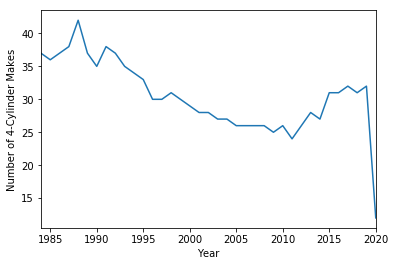

In [33]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print (fig)

In [34]:
from functools import reduce

grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])
unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
unique_makes = reduce(set.intersection, unique_makes)
print (unique_makes)

{'Subaru', 'Chevrolet', 'Toyota'}


In [35]:
boolean_mask = []

for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [36]:
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

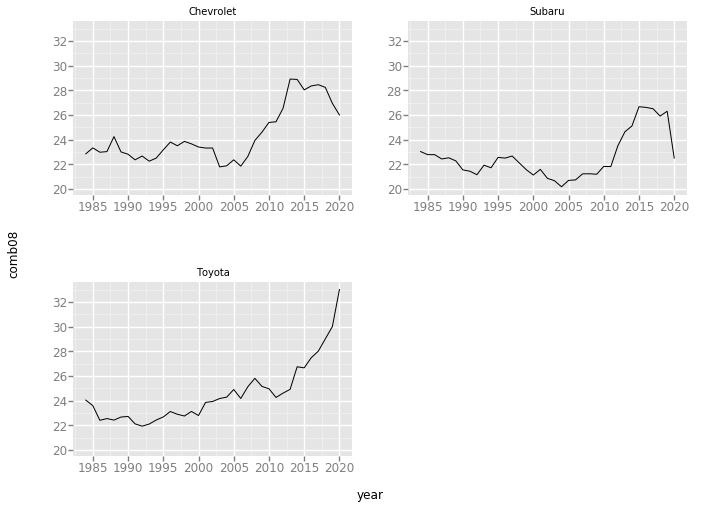

<ggplot: (-9223371893471979979)>

In [37]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')

In [38]:
df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()
test = vehicles_non_hybrid_4[vehicles_non_hybrid_4['make'].isin(unique_makes)]